<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [2]:
import pandas as pd
import urllib.parse as req
import plotly.express as px

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [4]:
# текст запроса
query_3_1 = f'''SELECT COUNT(id) cnt
                FROM vacancies
'''

In [5]:
# результат запроса
df = pd.read_sql_query(query_3_1, connection)
value = df['cnt'].iloc[0]
display(f'Количество вакансий в базе: {value}.')

'Количество вакансий в базе: 49197.'

2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [6]:
# текст запроса
query_3_2 = f'''SELECT COUNT(id) cnt
                FROM employers
'''

In [7]:
# результат запроса
df = pd.read_sql_query(query_3_2, connection)
value = df['cnt'].iloc[0]
display(f'Количество работодателей в базе: {value}.')

'Количество работодателей в базе: 23501.'

3. Посчитате с помощью запроса количество регионов (таблица areas).

In [8]:
# текст запроса
query_3_3 = f'''SELECT COUNT(id) cnt
                FROM areas
'''

In [9]:
# результат запроса
df = pd.read_sql_query(query_3_3, connection)
value = df['cnt'].iloc[0]
display(f'Количество регионов: {value}.')

'Количество регионов: 1362.'

4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [10]:
# текст запроса
query_3_4 = f'''SELECT COUNT(id) cnt
                FROM industries
'''

In [11]:
# результат запроса
df = pd.read_sql_query(query_3_4, connection)
value = df['cnt'].iloc[0]
display(f'Количество сфер деятельности: {value}.')

'Количество сфер деятельности: 294.'

***

### выводы по предварительному анализу данных

Соотношение работодателей и вакансий приблизительно 1 к 2. Большое количество регионов, видимо потому что здесь и города и регионы и страны одновременно, а еще у нас большая страна.

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [12]:
# текст запроса
query_4_1 = f'''SELECT
                      a.name area,
                      COUNT(v.id) cnt
                FROM areas a
                JOIN vacancies v on a.id = v.area_id
                GROUP BY a.id
                ORDER BY 2 DESC
                LIMIT 5
'''

In [13]:
# результат запроса
df = pd.read_sql_query(query_4_1, connection)
df

,area,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [14]:
# текст запроса
query_4_2 = f'''SELECT
                      COUNT(id) cnt
                FROM vacancies
                WHERE (salary_from IS NOT NULL) OR (salary_to IS NOT NULL)
'''

In [15]:
# результат запроса
df = pd.read_sql_query(query_4_2, connection)
value = df['cnt'].iloc[0]
display(f'У {value} вакансий заполнено хотя бы одно из двух полей с зарплатой.')

'У 24073 вакансий заполнено хотя бы одно из двух полей с зарплатой.'

3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [16]:
# текст запроса
query_4_3 = f'''SELECT
                      ROUND(AVG(salary_from)) salary_from,
                      ROUND(AVG(salary_to)) salary_to
                FROM vacancies
'''

In [17]:
# результат запроса
df = pd.read_sql_query(query_4_3, connection)
value_from = df['salary_from'].iloc[0]
value_to = df['salary_to'].iloc[0]
display(f'Среднее значение нижней границы зарплатной вилки: {value_from}. Среднее значение верхней границы зарплатной вилки: {value_to}.')

'Среднее значение нижней границы зарплатной вилки: 71065.0. Среднее значение верхней границы зарплатной вилки: 110537.0.'

4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [18]:
# текст запроса
query_4_4 = f'''SELECT
                      schedule,
                      employment,
                      COUNT(id) cnt
                FROM vacancies
                GROUP BY schedule, employment
                ORDER BY 3 DESC
'''

In [19]:
# результат запроса
df = pd.read_sql_query(query_4_4, connection)
df

,schedule,employment,cnt
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [20]:
# текст запроса
query_4_5 = f'''SELECT
                      experience,
                      COUNT(id) cnt
                FROM vacancies
                GROUP BY experience
                ORDER BY 2
'''

In [21]:
# результат запроса
df = pd.read_sql_query(query_4_5, connection)
df

,experience,cnt
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

### выводы по детальному анализу вакансий

Почти 10% от общего количества вакансий расположены в городе Москва, потому что Москва является основным центром деловой активности России. Далее с почти равным количеством вакансий(около 5-ти %) следуют 4 города
* Санкт-Петербург - культурная столица России и порт на Балтийском море;
* Минск - столица Беларуси;
* Новосибирск - столица Сибири;
* Алматы - бывшая столица и центр деловой активности Казахстана.

Почти у половины вакансий не указана заработная плата, по всей видимости работодатели оставляют себе "пространство для маневров".
Среднее значение минимальной заработной платы - 71065, что приблизительно равно средней заработной плате по России по версии Росстата за первую половину 2023 года, такое могло получиться из-за присутствия в выборке и других стран кроме России. Разница между средней минимальной и средней максимальной з/п(110537) составляет ~55%.
Наиболее востребованным сочетанием типа рабочего графика и типа трудоустройства является 'Полный день - Полная занятость', такое сочетание встречается в 35-ти тысячах вакансий. Также для ~94 % вакансий требуется тип трудоустройства - "Полная занятость".
В наибольшем количестве вакансий требуемый опыт от 1 года до 3 лет.

Соискатель с опытом работы от 1 года до 3 лет, ищущий работу на полную занятость и полный день в Москве с желаемой заработной платой в интревале 71-110 тыс. рублей, имеет наибольшие шансы на трудоустройство.

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [22]:
# текст запроса
query_5_1 = f'''SELECT
                      e.name employer,
                      COUNT(v.id) cnt
                FROM vacancies v
                JOIN employers e on v.employer_id = e.id
                GROUP BY e.name
                ORDER BY 2 DESC
                LIMIT 10
'''

In [23]:
# результат запроса
df = pd.read_sql_query(query_5_1, connection)
df

,employer,cnt
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,СБЕР,428
4,Газпром нефть,331
5,ИК СИБИНТЕК,327
6,МТС,292
7,DataArt,247
8,Совкомбанк Технологии,204
9,Первый Бит,176


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [24]:
# текст запроса
query_5_2 = f'''SELECT
                      a.name,
                      COUNT(DISTINCT e.id) cnt_employers
                FROM areas a
                LEFT JOIN vacancies v on a.id = v.area_id
                LEFT JOIN employers e on a.id = e.area
                GROUP BY a.id
                HAVING COUNT(v.id) < 1
                ORDER BY 2 DESC
                LIMIT 1
'''

In [25]:
# результат запроса
df = pd.read_sql_query(query_5_2, connection)
df

,name,cnt_employers
0,Россия,410


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [26]:
# текст запроса
query_5_3 = f'''SELECT
                      e.name,
                      COUNT(DISTINCT a.id) cnt_areas
                FROM vacancies v
                JOIN areas a on a.id = v.area_id
                JOIN employers e on v.employer_id = e.id
                GROUP BY e.id
                ORDER BY 2 DESC
'''

In [27]:
# результат запроса
df = pd.read_sql_query(query_5_3, connection)
df

,name,cnt_areas
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
14901,НПП Авиатрон,1
14902,Центр дистанционных торгов,1
14903,Городские Телекоммуникационные Системы,1
14904,"Введенский, Отель",1


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [28]:
# текст запроса
query_5_4 = f'''SELECT
                      COUNT(e.id) cnt
                FROM employers e
                LEFT JOIN employers_industries ei on e.id = ei.employer_id
                WHERE ei.employer_id IS NULL
'''

In [29]:
# результат запроса
df = pd.read_sql_query(query_5_4, connection)
value = df['cnt'].iloc[0]
display(f'В базе {value} работодателей, у которых не указана сфера деятельности.')

'В базе 8419 работодателей, у которых не указана сфера деятельности.'

5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [30]:
# текст запроса
query_5_5 = f'''SELECT
                      e.name
                FROM employers e
                JOIN employers_industries ei on e.id = ei.employer_id
                GROUP BY e.id
                HAVING COUNT(ei.employer_id) = 4
                ORDER BY 1
'''

In [31]:
# результат запроса
df = pd.read_sql_query(query_5_5, connection)
df

,name
0,101 Интернет
1,21vek.by
2,2ГИС
3,2К
4,4 пикселя +
...,...
1133,ЮРИОН
1134,ЮТИП Технологии
1135,ЯКласс
1136,ЯрНео


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [32]:
# текст запроса
query_5_6 = f'''SELECT
                      COUNT(e.id)
                FROM employers e
                JOIN employers_industries ei on e.id = ei.employer_id
                JOIN industries i on ei.industry_id = i.id
                WHERE i.name = 'Разработка программного обеспечения'
'''

In [33]:
# результат запроса
df = pd.read_sql_query(query_5_6, connection)
df

,count
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [34]:
path_common = req.urlparse('https://ru.wikipedia.org/wiki/Города-миллионеры_России#Список_городов-миллионеров')
url = path_common.scheme + '://' + req.quote(path_common.netloc) +  req.quote(path_common.path) + '#'+ req.quote(path_common.fragment)
df = pd.read_html(url)[1]
cities = tuple(df['Город'].tolist())

In [35]:
# текст запроса
query_5_7 = f'''WITH temp AS
                (SELECT
                       a.name,
                       COUNT(v.id) cnt
                FROM areas a
                JOIN vacancies v on a.id = v.area_id
                JOIN employers e on v.employer_id = e.id
                WHERE (e.name = 'Яндекс') AND (a.name IN {cities})
                GROUP BY a.id)
                SELECT *  FROM temp
                UNION ALL
                SELECT 'Total', sum(cnt)  FROM temp
'''

In [36]:
# результат запроса
df = pd.read_sql_query(query_5_7, connection)
df

,name,cnt
0,Москва,54.0
1,Санкт-Петербург,42.0
2,Екатеринбург,39.0
3,Новосибирск,35.0
4,Волгоград,24.0
5,Воронеж,32.0
6,Краснодар,30.0
7,Красноярск,23.0
8,Нижний Новгород,36.0
9,Омск,21.0


***

Дополнительное исследование

8. ТОП-3 компаний, разместивших свои вакансии в наибольшем количестве регионов. Вывод количества вакансий этих компаний в разрезе типов рабочего графика.

In [37]:
# текст запроса
query_5_8 = f'''SELECT
                       e.name,
                       v.schedule,
                       COUNT(v.id) cnt
                FROM vacancies v
                JOIN employers e on v.employer_id = e.id
                WHERE (e.name = 'Яндекс') OR (e.name = 'Ростелеком') OR (e.name = 'Спецремонт')
                GROUP BY e.id, v.schedule
'''

In [38]:
# результат запроса
df = pd.read_sql_query(query_5_8, connection)
df

,name,schedule,cnt
0,Яндекс,Гибкий график,55
1,Яндекс,Полный день,131
2,Яндекс,Сменный график,57
3,Яндекс,Удаленная работа,1690
4,Ростелеком,Гибкий график,4
5,Ростелеком,Полный день,350
6,Ростелеком,Сменный график,67
7,Ростелеком,Удаленная работа,70
8,Спецремонт,Гибкий график,36
9,Спецремонт,Полный день,65


### выводы по анализу работодателей
Наибольшее количество вакансий размещает компания "Яндекс"(~4% всех вакансий), Ростелеком, Тинькофф и СБЕР находятся на 2, 3, 4 местах соответственно (~1%).

В регионе "Россия" не опубликовано ни одной вакансии, при этом 410 работодателей указали его как регион своей деятельности. Могу предположить, что компании, указавшие данный регион, работают по всей России, а уже непосредственно в вакансиях указывают необходимый регион для какой-то определенной вакансии. 

Яндекс, Ростелеком и Спецремонт публикуют свои вакансии в большом количестве регионов. Проведя дополнительное исследование можно сделать выводы о причинах. У компании "Яндекс" подавляющее большинство вакансий предполагают удаленную работу, в таком случае регион нахождения работника не имеет значения, зато уровень заработной платы в регионах может быть ниже, чем, например, в Москве, что выгодно для компании. У "Ростелеком" специфика работы предполагает большое количество офисов, в каждый офис нужны работники. Компании "Спецремонт" также нужны работники в разных регионах - необходимость ремонтных работ нужна людям независимо от регионов.

В базе 8419 работодателей (~17%), у которых не указана сфера деятельности. У 1138 работодателй указаны 4 сферы деятельности.

у 3553 (~7%) работодателей в качестве сферы деятельности указана Разработка программного обеспечения. Это достаточно большое количество, значит данная сфера интенсивно развивается.

В разрезе количества вакансий "Яндекс" по городам-миллионникам ситуация складывается следущая: количество вакансий уменьшается сооразмерно общему количеству населения. Немного выбивается Нижний Новгород, предполагаю что это происходит из-за близости с Москвой.

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [39]:
# текст запроса
query_6_1 = f'''SELECT
                      COUNT(id)
                FROM vacancies v
                WHERE (name ~* 'data') OR (name ~* 'данн')
'''

In [40]:
# результат запроса
df = pd.read_sql_query(query_6_1, connection)
df

,count
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [41]:
# текст запроса
query_6_2 = f'''SELECT
                      COUNT(id)
                FROM vacancies
                WHERE name ~* 'data scien(tist|ce)|исследователь данных|ML|machine learning|машинн.*обучен.*'
                      AND name !~* 'HTML' 
                      AND (name ~* 'junior' OR experience = 'Нет опыта' OR employment = 'Стажировка')
'''

In [42]:
# результат запроса
df = pd.read_sql_query(query_6_2, connection)
df

,count
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [43]:
# текст запроса
query_6_3 = f'''SELECT
                      COUNT(id)
                FROM vacancies
                WHERE (name ~* 'data scien(tist|ce)|исследователь данных|machine learning|машинн.*обучен.*'
                      OR name ~ 'ML')
                      AND name !~* 'HTML'
                      AND (key_skills ~* 'SQL' OR key_skills ~* 'postgres')
'''

In [44]:
# результат запроса
df = pd.read_sql_query(query_6_3, connection)
df

,count
0,201


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [45]:
# текст запроса
query_6_4 = f'''SELECT
                      COUNT(id)
                FROM vacancies
                WHERE (name ~* 'data scien(tist|ce)|исследователь данных|machine learning|машинн.*обучен.*'
                      OR name ~ 'ML')
                      AND name !~* 'HTML'
                      AND key_skills ~* 'Python'
'''

In [46]:
# результат запроса
df = pd.read_sql_query(query_6_4, connection)
df

,count
0,351


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [47]:
# текст запроса
query_6_5 = f'''SELECT
                      ROUND(AVG(length(key_skills) - length(replace(key_skills, CHR(9), '')) +1), 2) key_skills
                FROM vacancies
                WHERE (name ~* 'data scien(tist|ce)|исследователь данных|machine learning|машинн.*обучен.*'
                      OR name ~ 'ML')
                      AND name !~* 'HTML'
'''

In [48]:
# результат запроса
df = pd.read_sql_query(query_6_5, connection)
df

,key_skills
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [49]:
# текст запроса
query_6_6 = f'''SELECT
                      experience,
                      ROUND(AVG(COALESCE(((salary_from + salary_to)/2), salary_from, salary_to))) avc_salary
                FROM vacancies
                WHERE (name ~* 'data scien(tist|ce)|исследователь данных|machine learning|машинн.*обучен.*'
                      OR name ~ 'ML')
                      AND name !~* 'HTML'
                      AND (salary_from IS NOT NULL OR salary_to IS NOT NULL)
                GROUP BY experience
'''

In [50]:
# результат запроса
df = pd.read_sql_query(query_6_6, connection)
df

,experience,avc_salary
0,Нет опыта,74643.0
1,От 1 года до 3 лет,139675.0
2,От 3 до 6 лет,243115.0


***

Дополнительное исследование
7. Количество вакансий для DS.

In [51]:
# текст запроса
query_6_7 = f'''SELECT
                      COUNT(id)
                FROM vacancies
                WHERE (name ~* 'data scien(tist|ce)|исследователь данных|machine learning|машинн.*обучен.*'
                      OR name ~ 'ML')
                      AND name !~* 'HTML'
'''

# результат запроса
df = pd.read_sql_query(query_6_7, connection)
df

,count
0,480


### выводы по предметному анализу
Связанными с данными имеют 1771 вакансий, что составляет 3,6% от всех вакансий.

Из 480 вакансий для дата-сайентиста начинающим подходит 51 вакансия(~10,6% от всех вакансий для DS). Цифра получилась небольшая, видимо работодатели в основном ищут работников с опытом.

В среднем в вакансиях для DS указывают 6 ключевых навыков, из них в 351 работодатели указали Python в качестве ключевого навыка, а в 201 указан SQL или postgres. Так как Python указан в 73% вакансий из этого можно сделать вывод что данный навык наиболее востребован.

Для начинающего дата-сайентиста работодатели в среднем предлагают заработную плату в размере 74643 рублей, для дата-сайентиста с опытом от 1 года до 3 лет средняя заработная плата уже выше на 87% и составляет 139675. На наибольшую заработную плату может претендовать кандидат с опытом работы от 3 до 6 лет - 243115 рублей, что на 74% выше, чем у кандидата с опытом от 1 года до 3 лет, и на 225% выше чем у начинающего дата-сайентиста. Наши данные не совсем точны из-за отсутствия данных по заработной плате для дата-сайентистов с опытом работы более 6 лет, на основании данных по предыдущим трем категориям можно предположить что их средняя заработная плата будет наиболее высокой, но работодатели по каким-либо причинам не указали ее ни в одной из вакансий.

***

### Дополнительные исследования

1. Распределение количества вакансий для DS в зависимости от региона вакансии и опыта работы.

In [52]:
# текст запроса
query_7_1 = f'''SELECT
                      t.area,
                      v.experience,
                      COUNT(v.id)
                FROM (SELECT
                            a.id,
                            a.name area
                        FROM public.areas a
                        JOIN public.vacancies v on a.id = v.area_id
                        WHERE (v.name ~* 'data scien(tist|ce)|исследователь данных|machine learning|машинн.*обучен.*'
                              OR v.name ~ 'ML')
                              AND v.name !~* 'HTML'
                        GROUP BY a.id
                        ORDER BY COUNT(v.id) DESC
                        LIMIT 5) As t
                JOIN public.vacancies v on t.id = v.area_id
                WHERE (v.name ~* 'data scien(tist|ce)|исследователь данных|machine learning|машинн.*обучен.*'
                      OR v.name ~ 'ML')
                      AND v.name !~* 'HTML'
                GROUP BY  t.area, v.experience
                
                UNION ALL
                
                SELECT
                      'Other',
                      v.experience,
                      COUNT(v.id)
                FROM (SELECT
                            a.id,
                            a.name area
                        FROM public.areas a
                        JOIN public.vacancies v on a.id = v.area_id
                        WHERE (v.name ~* 'data scien(tist|ce)|исследователь данных|machine learning|машинн.*обучен.*'
                              OR v.name ~ 'ML')
                              AND v.name !~* 'HTML'
                        GROUP BY a.id
                        ORDER BY COUNT(v.id) DESC
                        OFFSET 5) As t
                JOIN public.vacancies v on t.id = v.area_id
                WHERE (v.name ~* 'data scien(tist|ce)|исследователь данных|machine learning|машинн.*обучен.*'
                      OR v.name ~ 'ML')
                      AND v.name !~* 'HTML'
                GROUP BY v.experience
'''

In [53]:
# результат запроса
df_7_1 = pd.read_sql_query(query_7_1, connection)
df_7_1

,area,experience,count
0,Казань,Более 6 лет,1
1,Казань,Нет опыта,1
2,Казань,От 1 года до 3 лет,9
3,Казань,От 3 до 6 лет,5
4,Москва,Более 6 лет,8
5,Москва,Нет опыта,10
6,Москва,От 1 года до 3 лет,107
7,Москва,От 3 до 6 лет,92
8,Нижний Новгород,От 1 года до 3 лет,10
9,Нижний Новгород,От 3 до 6 лет,10


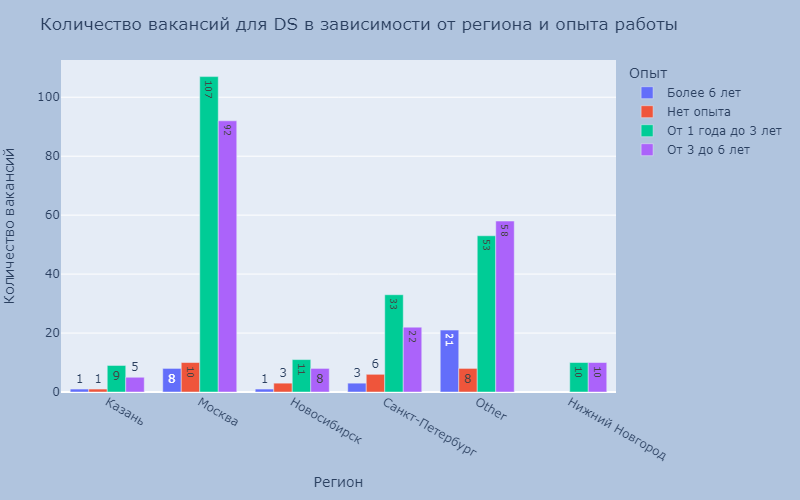

In [54]:
#строим график
fig = px.bar(
    df_7_1, #табличные данные
    x='area', #ось абсцисс
    y='count', #ось ординат
    height=500, #высота
    width=800, #ширина
    text_auto=True, #выводим надписи
    barmode='group', #режим диаграммы
    color='experience', #выделение цветом
    title='Количество вакансий для DS в зависимости от региона и опыта работы', #заголовок
    labels={'count':'Количество вакансий', 'area':'Регион', 'experience':'Опыт'} #название осей абсцисс и ординат
)

#форматирование
fig.update_layout(
    margin=dict(l=20, r=20, t=60, b=20),
    paper_bgcolor='LightSteelBlue'
)

#отображаем график
fig.show("png")

***

2. Какую зарплату для DS в указывают работодатели в зависимости от количества ключевых навыков и опыта работы. Данные берутся только из вакансий с хотя бы одной указанной заработной платой.

In [55]:
# текст запроса
query_7_2 = f'''SELECT
                      id,
                      length(key_skills) - length(replace(key_skills, CHR(9), '')) +1 key_skills,
                      experience,
                      COALESCE(((salary_from + salary_to)/2), salary_from, salary_to) salary
                FROM public.vacancies
                WHERE (name ~* 'data scien(tist|ce)|исследователь данных|machine learning|машинн.*обучен.*'
                      OR name ~ 'ML')
                      AND name !~* 'HTML'
                      AND (salary_from IS NOT NULL OR salary_to IS NOT NULL)
'''

In [56]:
# результат запроса
df_7_2 = pd.read_sql_query(query_7_2, connection)
df_7_2

,id,key_skills,experience,salary
0,54825318,8.0,От 1 года до 3 лет,60000
1,55166994,5.0,От 1 года до 3 лет,75000
2,52995746,3.0,От 1 года до 3 лет,60000
3,55553897,11.0,Нет опыта,37000
4,55145641,10.0,Нет опыта,50000
...,...,...,...,...
57,55236081,11.0,От 1 года до 3 лет,100000
58,55047447,5.0,От 3 до 6 лет,292242
59,55534594,10.0,От 1 года до 3 лет,175000
60,55306481,7.0,От 1 года до 3 лет,143500


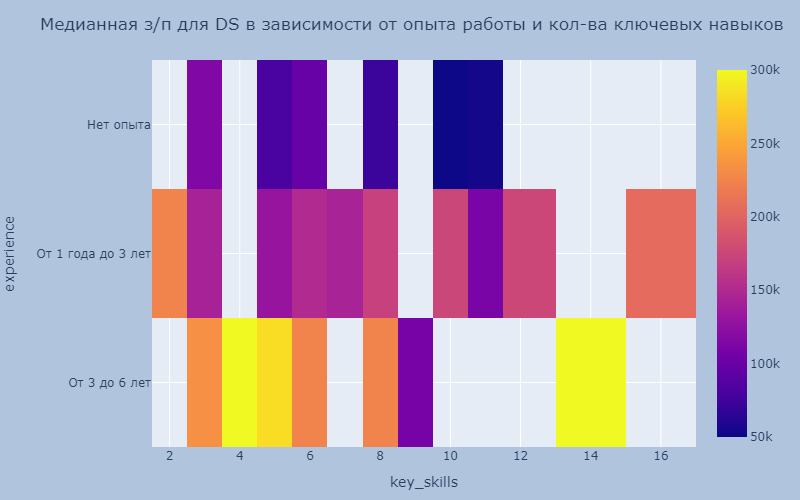

In [57]:
#группируем данные
pivot = df_7_2.pivot_table(
    values='salary', #значения
    index='experience', #строки
    columns='key_skills', #столбцы
    aggfunc='median' #применяемая функция
)

#строим график
fig = px.imshow(
    pivot, #табличные данные
    height=500, #высота
    width=800, #ширина
    title='Медианная з/п для DS в зависимости от опыта работы и кол-ва ключевых навыков', #заголовок
)

#форматирование
fig.update_layout(
    margin=dict(l=20, r=20, t=60, b=20),
    paper_bgcolor='LightSteelBlue',
)

#отображаем график
fig.show("png")

***

3. Распределение вакансий по регионам и типам рабочего графика.

In [58]:
# текст запроса
query_7_3 = f'''SELECT
                      t.area,
                      v.schedule,
                      COUNT(v.id) cnt
                FROM (SELECT
                            a.name area,
                            a.id
                        FROM public.areas a
                        JOIN public.vacancies v on a.id = v.area_id
                        WHERE (v.name ~* 'data scien(tist|ce)|исследователь данных|machine learning|машинн.*обучен.*'
                              OR v.name ~ 'ML')
                              AND v.name !~* 'HTML'
                        GROUP BY a.id
                        ORDER BY COUNT(v.id) DESC
                        LIMIT 5) AS t
                JOIN public.vacancies v on t.id = v.area_id
                WHERE (v.name ~* 'data scien(tist|ce)|исследователь данных|machine learning|машинн.*обучен.*'
                      OR v.name ~ 'ML')
                      AND v.name !~* 'HTML'
                GROUP BY  t.area, v.schedule
                
                UNION ALL
                
                SELECT
                      'Other',
                      v.schedule,
                      COUNT(v.id) cnt
                FROM (SELECT
                            a.name,
                            a.id
                        FROM public.areas a
                        JOIN public.vacancies v on a.id = v.area_id
                        WHERE (v.name ~* 'data scien(tist|ce)|исследователь данных|machine learning|машинн.*обучен.*'
                            OR v.name ~ 'ML')
                            AND v.name !~* 'HTML'
                        GROUP BY a.id
                        ORDER BY COUNT(v.id) DESC
                        OFFSET 5) AS t
                JOIN public.vacancies v on t.id = v.area_id
                WHERE (v.name ~* 'data scien(tist|ce)|исследователь данных|machine learning|машинн.*обучен.*'
                      OR v.name ~ 'ML')
                      AND v.name !~* 'HTML'
                GROUP BY  v.schedule
'''

In [59]:
# результат запроса
df_7_3 = pd.read_sql_query(query_7_3, connection)
df_7_3

,area,schedule,cnt
0,Казань,Гибкий график,1
1,Казань,Полный день,10
2,Казань,Удаленная работа,5
3,Москва,Гибкий график,11
4,Москва,Полный день,161
5,Москва,Удаленная работа,45
6,Нижний Новгород,Гибкий график,3
7,Нижний Новгород,Полный день,14
8,Нижний Новгород,Удаленная работа,3
9,Новосибирск,Гибкий график,5


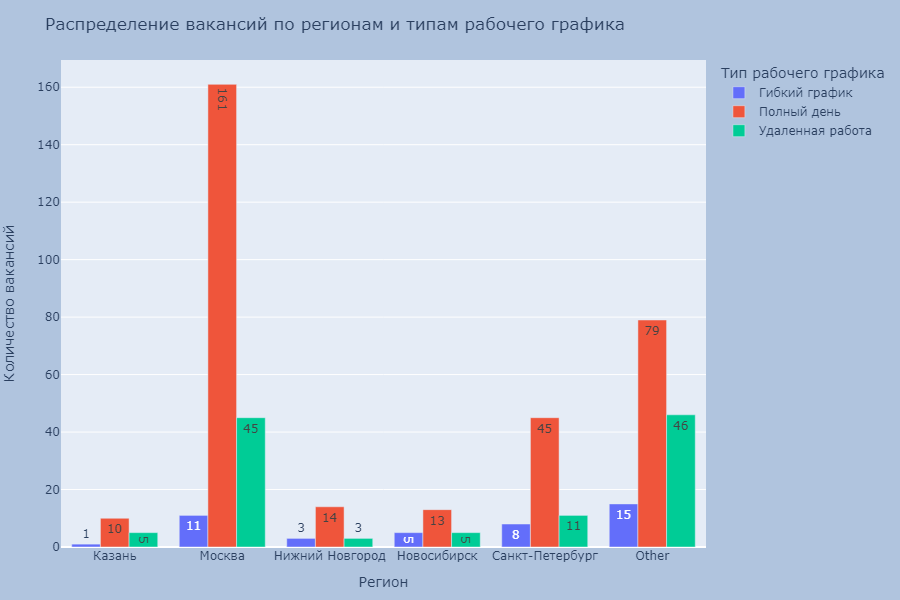

In [60]:
#строим график
fig = px.bar(
    df_7_3, #табличные данные
    x='area', #ось абсцисс
    y='cnt', #ось ординат
    height=600, #высота
    width=900, #ширина
    text_auto=True, #выводим надписи
    barmode='group', #режим диаграммы
    color='schedule', #выделение цветом
    title='Распределение вакансий по регионам и типам рабочего графика', #заголовок
    labels={'cnt':'Количество вакансий', 'area':'Регион', 'schedule':'Тип рабочего графика'} #название осей абсцисс и ординат
)

#форматирование
fig.update_layout(
    margin=dict(l=20, r=20, t=60, b=20),
    paper_bgcolor='LightSteelBlue'
)

#отображаем график
fig.show("png")

***

5. Количество вакансий для DS в разрезе сфер деятельности. Первые 10 сфер деятельности с наибольшим количеством вакансий.

In [61]:
# текст запроса
query_7_4 = f'''SELECT
                      i.name,
                      COUNT(v.id)
                FROM public.vacancies v
                JOIN public.employers_industries ei on v.employer_id = ei.employer_id
                JOIN public.industries i on ei.industry_id = i.id
                WHERE (v.name ~* 'data scien(tist|ce)|исследователь данных|machine learning|машинн.*обучен.*'
                      OR v.name ~ 'ML')
                      AND v.name !~* 'HTML'
                GROUP BY i.id
                ORDER BY 2 DESC
                LIMIT 10
'''

In [62]:
# результат запроса
df_7_4 = pd.read_sql_query(query_7_4, connection)
df_7_4

,name,count
0,Разработка программного обеспечения,148
1,"Системная интеграция, автоматизации технологи...",139
2,Банк,92
3,"Интернет-компания (поисковики, платежные систе...",79
4,Мобильная связь,23
5,"Маркетинговые, рекламные, BTL, дизайнерские, E...",22
6,"Управляющая, инвестиционная компания (управлен...",21
7,Консалтинговые услуги,16
8,Фиксированная связь,13
9,"Научно-исследовательская, научная, академическ...",9


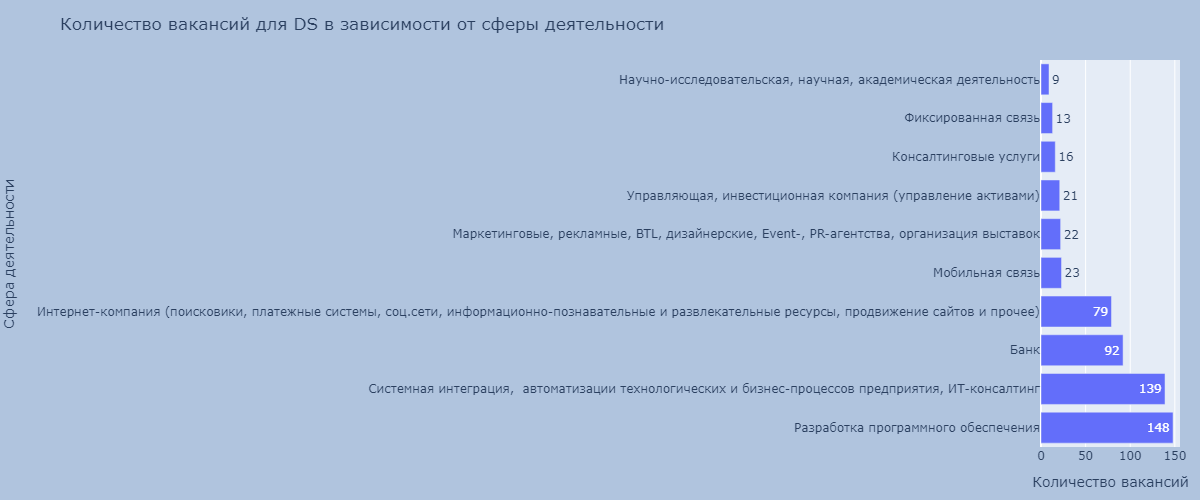

In [63]:
#строим график
fig = px.bar(
    df_7_4, #табличные данные
    y='name', #ось абсцисс
    x='count', #ось ординат
    height=500, #высота
    width=1200, #ширина
    text_auto=True, #выводим надписи
    title='Количество вакансий для DS в зависимости от сферы деятельности', #заголовок
    labels={'count':'Количество вакансий', 'name':'Сфера деятельности'} #название осей абсцисс и ординат
)

#форматирование
fig.update_layout(
    margin=dict(l=20, r=20, t=60, b=20),
    paper_bgcolor='LightSteelBlue'
)

#отображаем график
fig.show("png")

***

5. Количество вакансий с указанной и не указанной з/п, общее и для DS

In [64]:
# текст запроса
query_7_5 = f'''SELECT
                      'DS, указана' as type,
                      COUNT(id)
                FROM public.vacancies
                WHERE (name ~* 'data scien(tist|ce)|исследователь данных|machine learning|машинн.*обучен.*'
                      OR name ~ 'ML')
                      AND name !~* 'HTML'
                      AND (salary_from IS NOT NULL OR salary_to IS NOT NULL)
                      
                UNION ALL
                
                SELECT
                      'DS, не указана',
                      COUNT(id)
                FROM public.vacancies
                WHERE (name ~* 'data scien(tist|ce)|исследователь данных|machine learning|машинн.*обучен.*'
                      OR name ~ 'ML')
                      AND name !~* 'HTML'
                      AND (salary_from IS NULL AND salary_to IS NULL)
                      
                UNION ALL
                
                SELECT
                      'Все вакансии, указана',
                      COUNT(id)
                FROM public.vacancies
                WHERE salary_from IS NOT NULL OR salary_to IS NOT NULL
                      
                UNION ALL
                
                SELECT
                      'Все вакансии, не указана',
                      COUNT(id)
                FROM public.vacancies
                WHERE salary_from IS NULL AND salary_to IS NULL
'''

In [65]:
# результат запроса
df_7_5 = pd.read_sql_query(query_7_5, connection)
df_7_5

,type,count
0,"Все вакансии, не указана",25124
1,"Все вакансии, указана",24073
2,"DS, указана",62
3,"DS, не указана",418


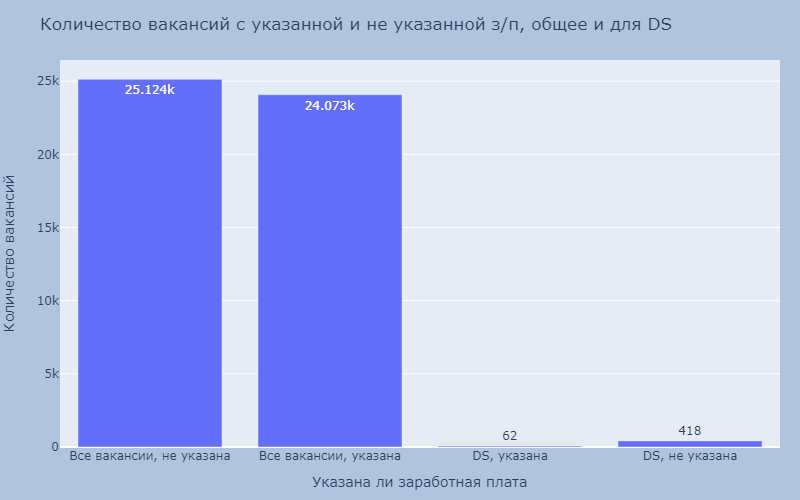

In [66]:
#строим график
fig = px.bar(
    df_7_5, #табличные данные
    x='type', #ось абсцисс
    y='count', #ось ординат
    height=500, #высота
    width=800, #ширина
    text_auto=True, #выводим надписи
    title='Количество вакансий с указанной и не указанной з/п, общее и для DS', #заголовок
    labels={'count':'Количество вакансий', 'type':'Указана ли заработная плата'} #название осей абсцисс и ординат
)

#форматирование
fig.update_layout(
    margin=dict(l=20, r=20, t=60, b=20),
    paper_bgcolor='LightSteelBlue'
)

#отображаем график
fig.show("png")

***

# Общий вывод по проекту

Соотношение работодателей и вакансий приблизительно 1 к 2.

Почти 10% от общего количества вакансий расположены в городе Москва, потому что Москва является основным центром деловой активности России. Далее с почти равным количеством вакансий(около 5-ти %) следуют 4 города
* Санкт-Петербург - культурная столица России и порт на Балтийском море;
* Минск - столица Беларуси;
* Новосибирск - столица Сибири;
* Алматы - бывшая столица и центр деловой активности Казахстана.

Почти у половины вакансий не указана заработная плата, по всей видимости работодатели оставляют себе "пространство для маневров".
Среднее значение минимальной заработной платы - 71065, что приблизительно равно средней заработной плате по России по версии Росстата за первую половину 2023 года, такое могло получиться из-за присутствия в выборке и других стран кроме России. Разница между средней минимальной и средней максимальной з/п(110537) составляет ~55%.
Наиболее востребованным сочетанием типа рабочего графика и типа трудоустройства является 'Полный день - Полная занятость', такое сочетание встречается в 35-ти тысячах вакансий. Также для ~94 % вакансий требуется тип трудоустройства - "Полная занятость".
В наибольшем количестве вакансий требуемый опыт от 1 года до 3 лет.

Соискатель с опытом работы от 1 года до 3 лет, ищущий работу на полную занятость и полный день в Москве с желаемой заработной платой в интревале 71-110 тыс. рублей, имеет наибольшие шансы на трудоустройство.

Связанными с данными имеют 1771 вакансий, что составляет 3,6% от всех вакансий.
Из 536 вакансий для дата-сайентиста начинающим подходит 51 вакансия(~9,6% от всех вакансий для DS). Цифра получилась небольшая, видимо работодатели в основном ищут работников с опытом.
В среднем в вакансиях для DS указывают 6 ключевых навыков, из них в 351 работодатели указали Python в качестве ключевого навыка, а в 201 указан SQL или postgres. Так как Python указан в 65% вакансий из этого можно сделать вывод что данный навык наиболее востребован.

Для начинающего дата-сайентиста работодатели в среднем предлагают заработную плату в размере 74643 рублей, для дата-сайентиста с опытом от 1 года до 3 лет средняя заработная плата уже выше на 87% и составляет 139675. На наибольшую заработную плату может претендовать кандидат с опытом работы от 3 до 6 лет - 243115 рублей, что на 74% выше, чем у кандидата с опытом от 1 года до 3 лет, и на 225% выше чем у начинающего дата-сайентиста. Наши данные не совсем точны из-за отсутствия данных по заработной плате для дата-сайентистов с опытом работы более 6 лет, на основании данных по предыдущим трем категориям можно предположить что их средняя заработная плата будет наиболее высокой, но работодатели по каким-либо причинам не указали ее ни в одной из вакансий.

Как и ожидалось наибольшее количество вакансий для дата-сайентистов в Москве, при этом требуются в основном кандидаты с опытом работы от 1 года до 6 лет. Для кандидатов без опыта или с опытом свыше 6 лет в Москве вакансий совсем немного, в Нижнем Новгороде их нет совсем. Но неожиданно много вакансий для сосикателей с опытом от 6 лет в регионах, которые не вошли в топ-5. Также в этих регионах интересные результаты по требованиям к типу рабочего графика. В большинстве вакансий требуется "полный день", на втором месте в большим отрывом "удаленная работа", а в "Other" разница между вакансиями "полный лень" и "удаленная работа" совсем небольшая. Могу предположить что это из-за того что вероятность найти кандидата с нужным опытом и навыками в относительно небольшом городе стремится к нулю и работодателям пришлось пойти на компромисс(компромисс потому что большинство работодателей предпочитают "полный день").

Если посмотреть на график распределения заработной платы в зависимости от требуемого опыта работы и количества указанных ключевых навыков, то в категории "Нет опыта" с возрастанием количества навыков медианная заработная плата только уменьшается. Предполагаю что такое могло произойти когда работодатель не совсем понимает какой работник нужен, какие ключевые навыки необходимы и из-за этого указывает все подряд навыки связанные с дата-сайенс. Также может быть набирают сотрудников без опыта чтобы в процессе они разошлись по более узким специализациям, тогда становится понятным почему з/п низкая, а ключевых навыков много - кандидату не нужно владеть всеми указанными навыками. В свою очередь это может отпугивать кандидата. В следующих категориях опыта не прослеживается никакой связи медианной з/п с количеством ключевых навыков. И естесственно с ростом требуемого опыта уровень заработной платы растет. Разброс очень велик - от 50 тыс. рублей до 300 тыс. рублей.

Причиной, по которой нет связи количества ключевых навыков с уровнем заработной платы, может быть отсутствие достаточного количества данных по з/п - если в общем количестве вакансий соотношение с указанной з/п и не указанной примерно 1 к 1, то у вакансий для дата-сайентистов в 87% она не указана.

Дата-сайентисты наиболее востребованы в разработке программного обеспечения - почти 31% вакансий приходится на данную сферу деятельности.